# Analysis of direct hit events in EUSO-SPB data

A demonstration of the functionality of the DirectHitTools.py

In [1]:
%matplotlib inline
import sys
sys.path.append('../')
from direct_hit_tools import DirectHitSearch

Set up the search object, open a ROOT file for analysis and print the default search parameters
* name of the file currently open
* counts_threhsold is used to identify signal over background
* duration_threshold is the maximum number of GTU an event can last
* min_area is the minimum number of pixels an event must cover
* max_sum is the maximum sum of the PDM permitted for the GTU of the event (used to discrimiate between noise events)

In [2]:
CurrentSearch = DirectHitSearch()

filename = '../data/allpackets-SPBEUSO-ACQUISITION-20170428-151019-001.001--LONG.root'
with CurrentSearch.open(filename) as myfile:
    CurrentSearch.print_search_params()

Search paramters:
-----------------
file:../data/allpackets-SPBEUSO-ACQUISITION-20170428-151019-001.001--LONG.root
counts_threshold: 6
duration_threshold: 2
min_area: 10
max_sum: 10000.0
pkt_len: 128


Run the search using these parameters. Properties of Detected events are stored in the lists:
* CurrentSearch.event_gtu: the GTU # of the event
* CurrentSearch.event_duration: the duration of the event (if < duration_threhsold)
* CurrentSearch.event_shape: crude classificaiton between linear and circular events  

First, all events above threshold are stored, then the CurrentSearch.rm_long_events() is used to sort these into the stored event lists. The progress bar shows the progress of the CurrentSearch.find_candidates() method, which is the 
most computationally intensive.

In [3]:
with CurrentSearch.open(filename) as myfile: 

    # look for events
    detection_gtu = CurrentSearch.find_candidates()

    # remove long events
    CurrentSearch.rm_long_events(detection_gtu)

    # classify shape
    CurrentSearch.classify_shape()

The search object can also be used to plot events in the event list, as demonstrated here.

circular
circular
linear
circular
circular


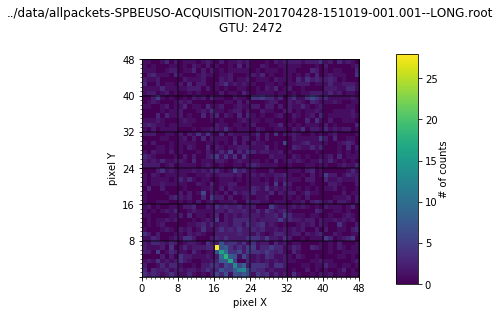

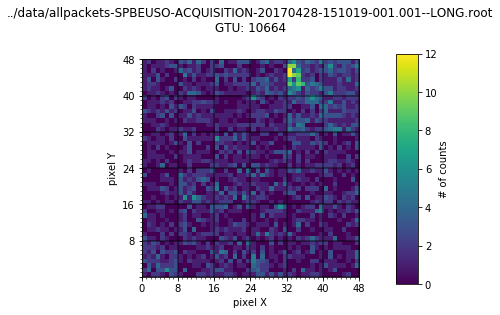

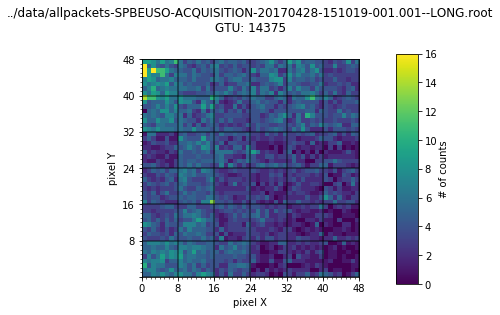

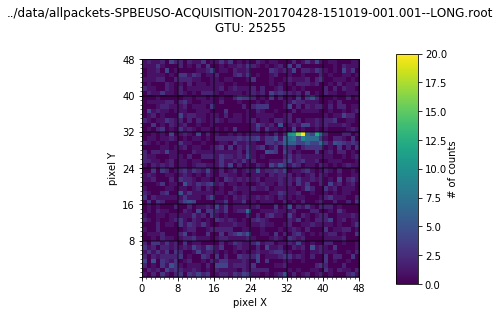

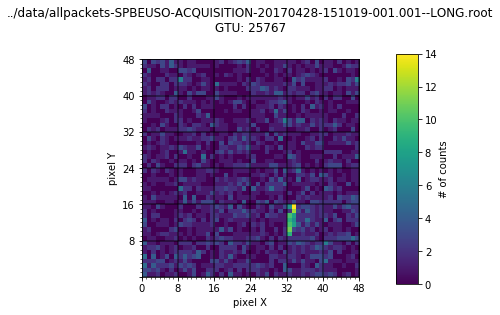

In [4]:
# plot the events
with CurrentSearch.open(filename) as myfile:
    for i, eg in enumerate(CurrentSearch.Events.gtu):
        print CurrentSearch.Events.shape[i]
        CurrentSearch.plot_focal_surface(eg)